<img src="https://s3-sa-east-1.amazonaws.com/preditiva.ai/diversos/preditiva_assinatura.jpg">

# Regressão Linear Múltipla

## Case 1: Salários de CEOs

Uma consultoria americana foi contratada para estimar o efeito da valor de mercado sobre o salário do CEO de empresas americanas. O cliente sugeriu o seguinte modelo:

 salario = ${\beta}_{0}+{\beta}_{1}*anos empresa + {\beta}_{2}*anos como ceo + {\beta}_{3}*vendas totais + {\beta}_{4}*valuation + {\beta}_{5}*margem  $

em que:

`anos empresa` são os anos totais de trabalho na empresa;<br>
`anos como ceo` são os anos de trabalhando como CEO na empresa;<br>
`vendas totais` são as vendas totais da empresa, em milhões de dólares;<br>
`valuation` é o valor de mercado da empresa, em milhões de dólares; ⁡<br>
`margem` é o lucro como porcentagem das vendas;

Com posse da base fornecida pelo cliente `salario_ceo.csv`, responda:

**É possível estimar o salário de CEOs a partir das variáveis fornecidas?**

### Importação das bibliotecas

In [1]:
# Pacotes de manipulação de dados
import numpy as np
import pandas as pd

# Pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de data science
import statsmodels.api as sm

### Importação da base de dados

In [256]:
df_salario_ceo = pd.read_csv('salario_ceo.csv', sep = ';')
df_salario_ceo['lucro'] = df_salario_ceo['vendas_totais'] * df_salario_ceo['margem']
df_salario_ceo.head()

,anos_empresa,anos_como_ceo,salario,vendas_totais,valuation,margem,lucro
0,9,2,1161,6200,23200,15.6,96720.0
1,10,10,600,283,1100,17.0,4811.0
2,9,3,378,169,1100,23.7,4005.3
3,22,22,650,1100,999,-4.9,-5390.0
4,8,6,496,350,387,8.0,2800.0


In [258]:
faixa_salarial = pd.cut(df_salario_ceo['salario'], bins = 4)
df_salario_ceo.groupby(by=faixa_salarial).describe()['salario']

,count,mean,std,min,25%,50%,75%,max
salario,,,,,,,,
"(93.8, 1399.0]",156.0,712.083333,324.403969,99.0,457.5,649.5,973.5,1392.0
"(1399.0, 2699.0]",19.0,1788.947368,260.633944,1443.0,1613.0,1737.0,1983.0,2264.0
"(2699.0, 3999.0]",1.0,2792.000000,NaN,2792.0,2792.0,2792.0,2792.0,2792.0
"(3999.0, 5299.0]",1.0,5299.000000,NaN,5299.0,5299.0,5299.0,5299.0,5299.0


### Análise Exploratória de Dados

In [259]:
df_salario_ceo.describe()

,anos_empresa,anos_como_ceo,salario,vendas_totais,valuation,margem,lucro
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,22.502825,7.954802,865.344633,3528.983051,3599.875706,6.423729,20793.687006
std,12.294735,7.150826,587.637837,6088.636588,6442.307591,17.864245,40499.393036
min,2.000000,0.000000,99.000000,29.000000,387.000000,-203.100000,-46050.600000
25%,12.000000,3.000000,470.000000,561.000000,644.000000,4.200000,3396.000000
50%,23.000000,6.000000,707.000000,1399.000000,1200.000000,6.800000,6296.400000
75%,33.000000,11.000000,1119.000000,3500.000000,3500.000000,10.900000,20565.300000
max,58.000000,37.000000,5299.000000,51300.000000,45400.000000,47.500000,271890.000000


### Comente sobre os sinais esperados dos coeficientes, justificando suas respostas. 

`Dica :` Faça uma análise de dispersão gráfica e usando matriz de correlação.

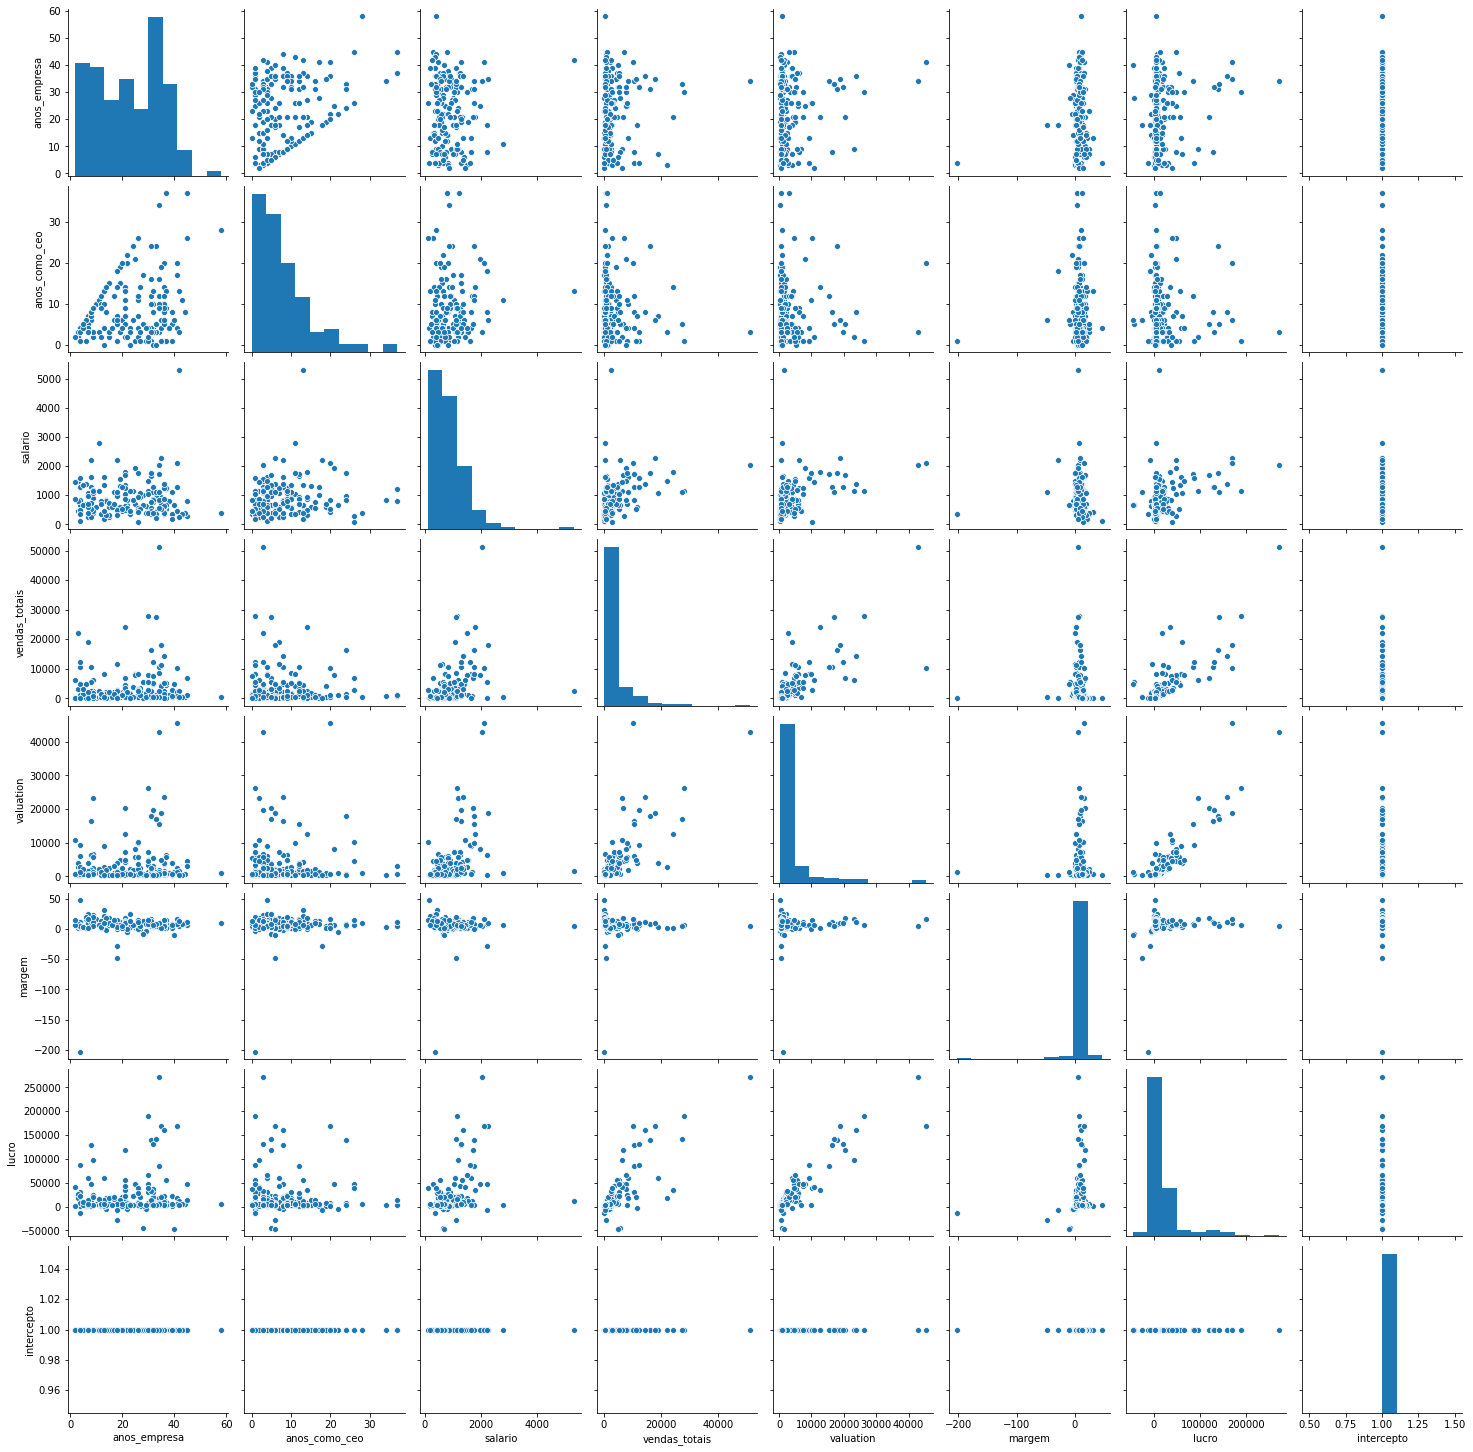

In [272]:
# Análise de Dispersão Gráfica
sns.pairplot(df_salario_ceo);

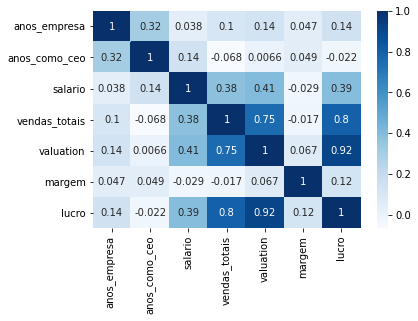

In [264]:
# Matriz de Correlação
sns.heatmap(df_salario_ceo.corr(), annot = True, cmap= 'Blues');

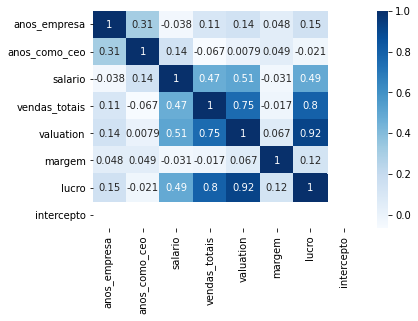

In [271]:
# Matriz de Correlação
df = df_salario_ceo.drop(index= [102]) ## autliers das séries Salário e Margem
sns.heatmap(df.corr(), annot = True, cmap= 'Blues');

Comentários sobre os Sinais Esperados do Coeficientes<br>
Analisando os __gráficos de dispersão__ e a __matriz de correlação__, identificamos que:

1. __Anos de Empresa__ : coeficiente positivo mas próximo de zero.
2. __Anos como CEO__ : possui um coeficiente positivo, mas pouco expresivo em relação ao salário
3. __Vendas Totais__ : Possui o segundo maior coeficiente em relação ao salário. Porém possui uma correlação fortíssima em relação ao valuation  
4. __Valuation__ : Possui o maior coeficiente em relação ao salário. Porém possui uma correlação fortíssima em relação às vendas totais. 
5. __Margem__ : coeficiente __negativo__ mas próximo de zero.
6. __Lucro__ : Possui uma correlação forte com o salário. Mas também possui uma forte correção com o Valuation



### Ajuste um modelo de Regressão Linear Múltipla com as variáveis sugeridas pela consultoria

In [265]:
# Variável resposta
y = df_salario_ceo['salario']
# Variáveis explicativas
df_salario_ceo['intercepto'] = 1
x = df_salario_ceo[['intercepto','anos_empresa', 'anos_como_ceo', 'vendas_totais','valuation', 'margem']]
# Ajusta o modelo e retorna os resultados
modelo_1 = sm.OLS(y , x)
resultado_modelo_1 = modelo_1.fit()
print(resultado_modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     9.017
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           1.26e-07
Time:                        20:20:18   Log-Likelihood:                -1358.5
No. Observations:                 177   AIC:                             2729.
Df Residuals:                     171   BIC:                             2748.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercepto      682.2568     88.841      7.680

### O sinal dos coeficientes estimados associados às variáveis `anos empresa` e `margem` estão de acordo com o esperado? Justifique.

As variáveis __anos de empresa__ e __margem__ não estão de acordo com o esperado. De acordo com o resultado, o salário diminui a cada ano de empresa do CEO e quanto menor a margem, maior seria o salário. 

O que não faz o menor sentido, se a empresa não tem margem ela não terá lucro para pagar um salário mais alto pro CEO


### Avalie a qualidade do modelo de regressão linear múltipla proposto. Ele é estatísticamente significante?

`Dica :` Verifique o R Quadrado ajustado do modelo e também o p-valor dos coeficientes.

R²:<br>
O R Quadrado ajustado está muito baixo, diz que as variáveis explicativas respondem 18% no valor do salário dos CEO's

Variáveis Explicativas:<br>
As variáveis anos_empresa, margem e vendas_totais estão com o P valor acima de 5%, ou seja, não são estatíticamente significantes para o modelo. 
Vendas Totais possui uma correlação significativa com o salário, mas também possui uma forte correlação com o valuation

### Realize os ajustes necessários no modelo, removendo variáveis que não sejam estatisticamente significantes até que o modelo resultante esteja adequado.

`Dica :` Quando for excluir variáveis explicativas, remova-as uma de cada vez para garantir que está realizando a análise correta para a remoção.

In [270]:
df_salario_ceo_2 = df_salario_ceo.copy()
df_salario_ceo_2 =df_salario_ceo_2.drop(index=102)
# Variável resposta
y_2 = df_salario_ceo_2['salario']
# Variáveis explicativas
x_2 = df_salario_ceo_2[['intercepto', 'vendas_totais','valuation', 'anos_como_ceo']]

# Ajusta o modelo e retorna os resultados
modelo_2 = sm.OLS(y_2 , x_2)
resultado_modelo_2 = modelo_2.fit()
print(resultado_modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     24.74
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           2.33e-13
Time:                        20:23:24   Log-Likelihood:                -1305.7
No. Observations:                 176   AIC:                             2619.
Df Residuals:                     172   BIC:                             2632.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercepto      604.5068     50.268     12.026

Ao retirar a margem , anos_empresa e __retirar um outlier__ que possuia um salário mais elevado o R² aumentou para 28%

### Interprete os coeficientes do modelo em termos do problema de negócio.

Este modelo explica 28% da variação do salário. <br>
O salário inicial de um CEO, no início da carreira, quando vendas e valuation é igual a zero é de $604;<br>
A cada ano como CEO o salário recebe um incremento de 10.12 e não varia muito em relação o valuation e as vendas

### É possível melhorar a qualidade do ajuste do modelo? Isto é, melhorar o R Quadrado ajustado?

`Dica :` Muitas vezes a variável resposta não é correlacionada linearmente com as variáveis explicativas (features). Isso acontece pois as features podem ter outra relação de linearidade, como por exemplo a log-linear. Desta forma, é útil tentar ajustar um modelo log-linear, da seguinte forma:

log(salario) = ${\beta}_{0}+{\beta}_{1}*log(anos empresa) + {\beta}_{2}*log(anos como ceo) + {\beta}_{3}*log(vendas totais) + {\beta}_{4}*log(valuation) + {\beta}_{5}*log(margem)  $

Nem todas as varíaves ficaram melhores usando log. Portanto, é útil misturar features com e sem transformações de log. Veja exemplo: 

log(salario) = ${\beta}_{0}+{\beta}_{1}*anos empresa + {\beta}_{2}*anos como ceo+ {\beta}_{3}*log(vendas totais) + {\beta}_{4}*log(valuation) + {\beta}_{5}*margem  $

In [242]:
df_salario_ceo_3 = df_salario_ceo.copy()


df_salario_ceo_3['ln_salario'] = np.log(df_salario_ceo_3['salario'])
df_salario_ceo_3['ln_anos_empresa'] = np.log(df_salario_ceo_3['anos_empresa']+1)
df_salario_ceo_3['ln_anos_como_ceo'] = np.log(df_salario_ceo_3['anos_como_ceo']+1)
df_salario_ceo_3['ln_vendas_totais'] = np.log(df_salario_ceo_3['vendas_totais']+1)
df_salario_ceo_3['ln_valuation'] = np.log(df_salario_ceo_3['valuation']+1)
df_salario_ceo_3['ln_margem'] = np.log(df_salario_ceo_3['margem']+1)

c:\users\mtspe\documents\preditiva\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


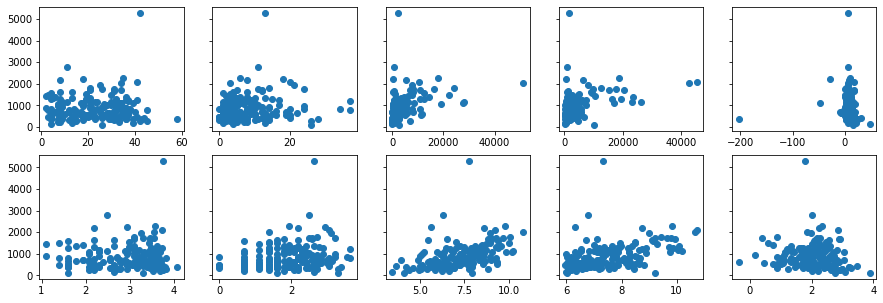

In [233]:
fig, ((ax1,ax2,ax3,ax4,ax5),
      (ax6,ax7,ax8,ax9,ax10)) = plt.subplots(2,5,sharey=True,figsize=(15,5))

ax1.scatter(df_salario_ceo_3['anos_empresa'],df_salario_ceo_3['salario']);
ax2.scatter(df_salario_ceo_3['anos_como_ceo'],df_salario_ceo_3['salario']);
ax3.scatter(df_salario_ceo_3['vendas_totais'],df_salario_ceo_3['salario']);
ax4.scatter(df_salario_ceo_3['valuation'],df_salario_ceo_3['salario']);
ax5.scatter(df_salario_ceo_3['margem'],df_salario_ceo_3['salario']);

ax6.scatter(df_salario_ceo_3['ln_anos_empresa'],df_salario_ceo_3['salario'])
ax7.scatter(df_salario_ceo_3['ln_anos_como_ceo'],df_salario_ceo_3['salario'])
ax8.scatter(df_salario_ceo_3['ln_vendas_totais'],df_salario_ceo_3['salario'])
ax9.scatter(df_salario_ceo_3['ln_valuation'],df_salario_ceo_3['salario'])
ax10.scatter(df_salario_ceo_3['ln_margem'],df_salario_ceo_3['salario']);

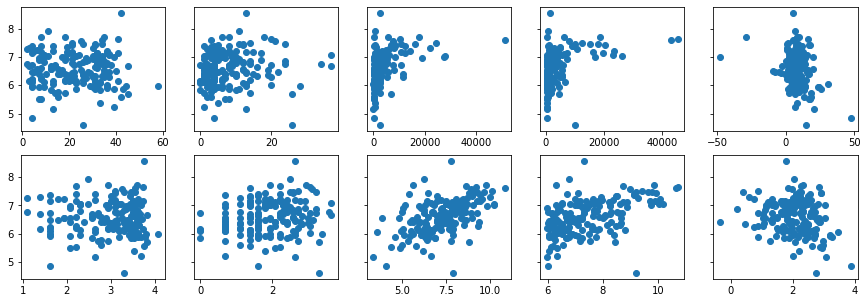

In [225]:
fig, ((ax1,ax2,ax3,ax4,ax5),
      (ax6,ax7,ax8,ax9,ax10)) = plt.subplots(2,5,sharey=True,figsize=(15,5))

ax1.scatter(df_salario_ceo_3['anos_empresa'],df_salario_ceo_3['ln_salario'])
ax2.scatter(df_salario_ceo_3['anos_como_ceo'],df_salario_ceo_3['ln_salario'])
ax3.scatter(df_salario_ceo_3['vendas_totais'],df_salario_ceo_3['ln_salario'])
ax4.scatter(df_salario_ceo_3['valuation'],df_salario_ceo_3['ln_salario'])
ax5.scatter(df_salario_ceo_3['margem'],df_salario_ceo_3['ln_salario'])

ax6.scatter(df_salario_ceo_3['ln_anos_empresa'],df_salario_ceo_3['ln_salario'])
ax7.scatter(df_salario_ceo_3['ln_anos_como_ceo'],df_salario_ceo_3['ln_salario'])
ax8.scatter(df_salario_ceo_3['ln_vendas_totais'],df_salario_ceo_3['ln_salario'])
ax9.scatter(df_salario_ceo_3['ln_valuation'],df_salario_ceo_3['ln_salario'])
ax10.scatter(df_salario_ceo_3['ln_margem'],df_salario_ceo_3['ln_salario']);

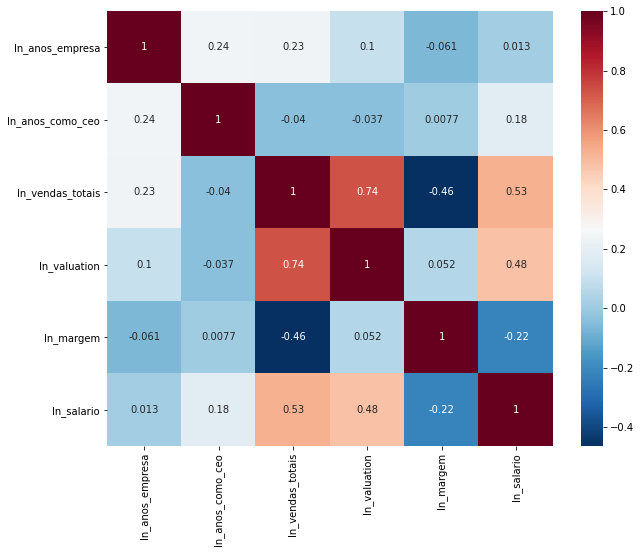

In [234]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(df_salario_ceo_3[['ln_anos_empresa','ln_anos_como_ceo','ln_vendas_totais','ln_valuation','ln_margem', 'ln_salario']].corr(),cmap='RdBu_r',annot=True);

In [253]:
# Variável resposta
y_linear = df_salario_ceo_3['salario']
y_log = df_salario_ceo_3['ln_salario']
# Variáveis explicativas
x_linear = df_salario_ceo_3[['anos_empresa', 'anos_como_ceo', 'vendas_totais','valuation', 'margem']]
x_log = df_salario_ceo_3[['ln_valuation']]


In [254]:
# Ajusta o modelo e retorna os resultados
modelo_log_log = sm.OLS(y_log , x_log)
resultado_modelo_log_log = modelo_log_log.fit()
print(resultado_modelo_log_log.summary())

                                 OLS Regression Results                                
Dep. Variable:             ln_salario   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              9689.
Date:                Fri, 02 Apr 2021   Prob (F-statistic):                   8.04e-156
Time:                        20:15:58   Log-Likelihood:                         -229.09
No. Observations:                 177   AIC:                                      460.2
Df Residuals:                     176   BIC:                                      463.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

O modelo com o maior R² encontrado por mim foi de 0.982, que explica 98% da variação do salário. Utilizando os dados transformados em log(y) = log(x)

### Interprete os coeficientes do novo modelo utilizando as variáveis transformadas em termos do problema de negócio.

`Dica :` A interpretação de modelos que usam log mudam. Veja o resumo na tabela abaixo para guiar a interpretação dos coeficientes do modelo.

<p align='left'><img src="https://s3-sa-east-1.amazonaws.com/preditiva.ai/diversos/interpretacao_beta.png"></p>

Cheguei a fórmula: __log(y) = log(ln_valuation) * 0.8751__

Significa que: no aumento de 1% no na variável valuation, aumenta-se em 0.8751% de Y